In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
data = pd.read_csv('data_with_scores.csv')

# gives length of comments (note: also counts stop words and possible noise)
def count_words(comment):
    if isinstance(comment, str):
        words = comment.split()
        return len(words)
    else:
        return 0
    
data['word_count'] = data['comments'].apply(count_words)


In [35]:
# Summary statistics of sentiment scores
vader_summary = data['c_vader'].describe()
textblob_summary = data['c_textb'].describe()

# Summary statistics of scraped data
comments_by_sector = data['sector'].value_counts()
comments_by_ticker = data['name'].value_counts()
comments_length = data['word_count'].describe()

# Printing results
output_file = 'summary_statistics.txt'
with open(output_file, 'w') as file:
    
    file.write("Summary Statistics for Sentiment Scores (Vader API):\n")
    file.write(str(vader_summary) + '\n\n')
    file.write("Summary Statistics for Sentiment Scores (Textblob):\n")
    file.write(str(textblob_summary) + '\n\n')
    file.write("Count of Comments by Sector:\n")
    file.write(str(comments_by_sector) + '\n\n')
    file.write("Summary Statistics for number of words per comment:\n")
    file.write(str(comments_length) + '\n\n')
    file.write("Count of Comments by Stock Ticker:\n")
    file.write(str(comments_by_ticker) + '\n\n')


print("Summary statistics saved to", output_file)


Summary statistics saved to summary_statistics.txt


In [36]:
# Transforming data into the appropriate format 
# Note: one might need to change the format in function of the date format of the .csv file
data['date'] = pd.to_datetime(data['date'])

#Extracting data for some specific sectors
data_financials = data[data['sector'] == 'Financials']
data_consdisc = data[data['sector'] == 'Consumer Discretionary']

# Number of comments every day
comments_by_day = data['date'].value_counts().sort_index()

#Taking the moving average over 1 week
moving_avg_step = int(7)
comments_by_week = comments_by_day.rolling(moving_avg_step, min_periods=1).mean()


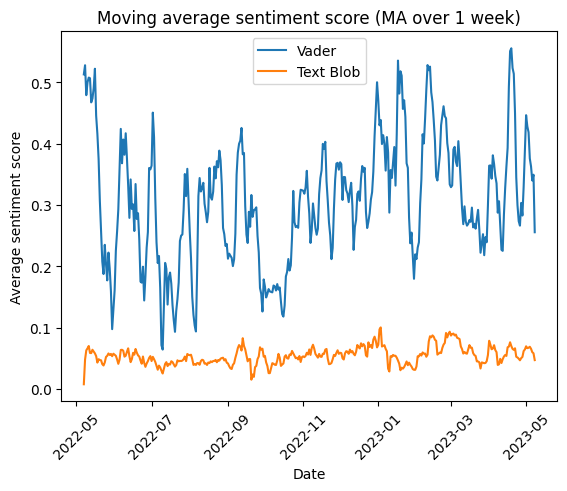

In [37]:
#Seeing comparison between sentiment score and stock prices
daily_average_vader = data.groupby(pd.Grouper(key='date', freq='D'))['c_vader'].mean()
daily_average_textb = data.groupby(pd.Grouper(key='date', freq='D'))['c_textb'].mean()

plt.plot(daily_average_vader.index, daily_average_vader.rolling(moving_avg_step, min_periods=1).mean(), label = 'Vader')
plt.plot(daily_average_textb.index, daily_average_textb.rolling(moving_avg_step, min_periods=1).mean(), label = 'Text Blob')

plt.xlabel('Date')
plt.ylabel('Average sentiment score')
plt.title('Moving average sentiment score (MA over 1 week)')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('MA_sentiment_score.png', bbox_inches = 'tight')

plt.show()

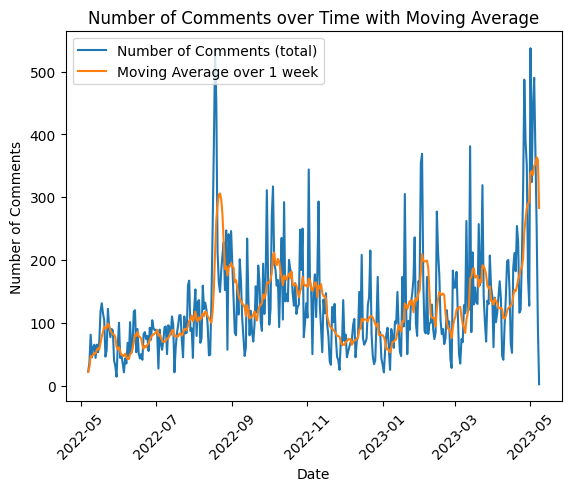

In [38]:
# Plotting total number of comments
plt.plot(comments_by_day.index, comments_by_day.values, label='Number of Comments (total)')
plt.plot(comments_by_week.index,comments_by_week.values, label='Moving Average over 1 week')

plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments over Time with Moving Average')
plt.legend()
plt.xticks(rotation=45)

plt.savefig('nbr_comments_over_time.png', bbox_inches = 'tight')
plt.show()

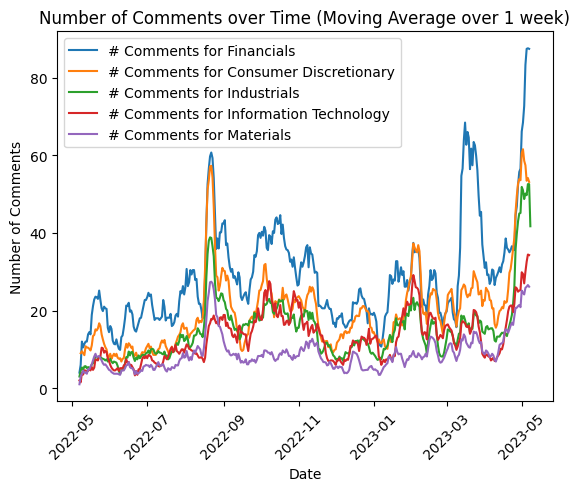

In [39]:
# Main sectors 
sectors = ['Financials','Consumer Discretionary', 'Industrials', 'Information Technology',  'Materials']

# Plotting the number of comments per day for each sector (moving average over 1 week)
moving_avg_step = int(7)

for idx, sector in enumerate(sectors) :
    data_sector = data[data['sector'] == sector]
    comments_by_day_sector = data_sector['date'].value_counts().sort_index() # Number of comments every day
    comments_by_week_sector = comments_by_day_sector.rolling(moving_avg_step, min_periods=1).mean()
    plt.plot(comments_by_week_sector.index,comments_by_week_sector.values, label= str('# Comments for ' + sector))

plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments over Time (Moving Average over 1 week)')
plt.legend()
plt.xticks(rotation=45)

plt.savefig('nbr_comments_mainsectors', bbox_inches = 'tight')
plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


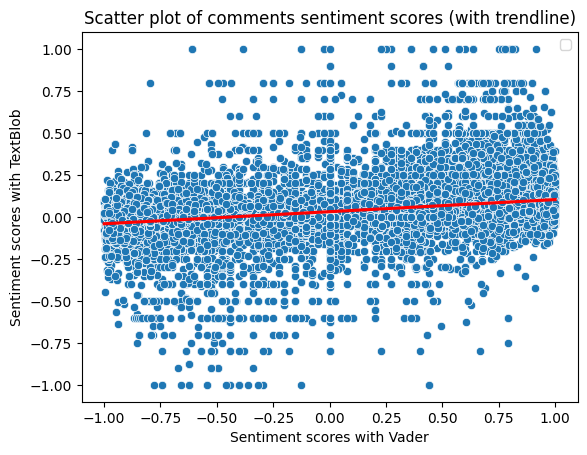

: 

In [40]:
# Comparing the various sentiment scores

sns.scatterplot(x='c_vader', y='c_textb', data=data)
sns.regplot(x='c_vader', y='c_textb', data=data, scatter=False, color ='r')


plt.xlabel('Sentiment scores with Vader')
plt.ylabel('Sentiment scores with TextBlob')
plt.title('Scatter plot of comments sentiment scores (with trendline)')
plt.legend()

plt.savefig('scatterplot_vader_textb.png', bbox_inches = 'tight')
plt.show()